## CX Calibration with HPO

#### Imports

In [1]:
import sys
import os
import matplotlib.pyplot as plt

os.environ["KMP_DUPLICATE_LIB_OK"] = "True"
module_path = os.path.abspath(
    os.path.join(
        "/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control"
    )
)
if module_path not in sys.path:
    sys.path.append(module_path)

from template_configurations.qiskit.q_env_config import (
    q_env_config as gate_q_env_config,
)
from quantumenvironment import QuantumEnvironment
from hyperparameter_optimization import HyperparameterOptimizer
from gymnasium.wrappers import RescaleAction, ClipAction

import logging

logging.basicConfig(
    level=logging.WARNING,
    format="%(asctime)s INFO %(message)s",  # hardcoded INFO level
    datefmt="%Y-%m-%d %H:%M:%S",
    stream=sys.stdout,
)

/Users/lukasvoss/anaconda3/lib/python3.11/site-packages/qiskit_dynamics/dispatch/backends/jax.py:34: UserWarning: The functionality in the perturbation module of Qiskit Dynamics requires a JAX version <= 0.4.6, due to a bug in JAX versions > 0.4.6. For versions 0.4.4, 0.4.5, and 0.4.6, using the perturbation module functionality requires setting os.environ['JAX_JIT_PJIT_API_MERGE'] = '0' before importing JAX or Dynamics.
  warnings.warn(


Circuit context
global phase: π/2
                                                                    ┌───┐     »
      q_3 -> 0 ─────────────────────────────────────────────────────┤ X ├─────»
                                           ┌───┐     ┌───┐     ┌───┐└─┬─┘     »
      q_1 -> 1 ────────────────────────────┤ X ├─────┤ X ├──■──┤ X ├──■────■──»
                                           └─┬─┘     └─┬─┘  │  └─┬─┘     ┌─┴─┐»
      q_4 -> 2 ──────────────────────────────┼─────────┼────┼────┼───────┤ X ├»
               ┌─────────┐┌────┐┌─────────┐  │         │  ┌─┴─┐  │       └───┘»
      q_0 -> 3 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├──■────■────■──┤ X ├──■────────────»
               └─────────┘└────┘└─────────┘       │       └───┘               »
ancilla_0 -> 4 ───────────────────────────────────┼───────────────────────────»
                                                ┌─┴─┐                         »
      q_2 -> 5 ─────────────────────────────────┤ X ├─────────────────────────»
      

Which gate is to be calibrated?

In [2]:
gate_q_env_config.target

{'register': [0, 1],
 'gate': Instruction(name='cx', num_qubits=2, num_clbits=0, params=[])}

### Perform HPO

Set path to the files specifying the RL agent and where to store the HPO results

In [3]:
current_dir = os.getcwd()

path_agent_config = os.path.join(os.path.dirname(current_dir), "agent_config.yaml")
path_hpo_config = os.path.join(current_dir, "hpo_config.yaml")
save_results_path = "hpo_results"

#### Create the QuantumEnvironment, clip and rescale the action space

In [4]:
# Define the original action space
print("Initial loower bounds:", gate_q_env_config.action_space.low)
print("Initial upper bounds:", gate_q_env_config.action_space.high)

q_env = QuantumEnvironment(gate_q_env_config)

# Apply the RescaleAction wrapper
q_env = ClipAction(q_env)
q_env = RescaleAction(q_env, min_action=-1.0, max_action=1.0)

# Confirm the rescale box dimensions
print("Rescaled lower bounds:", q_env.action_space.low)
print("Rescaled upper bounds:", q_env.action_space.high)

Initial loower bounds: [-3.14 -3.14 -3.14 -3.14 -3.14 -3.14 -3.14]
Initial upper bounds: [3.14 3.14 3.14 3.14 3.14 3.14 3.14]
Rescaled lower bounds: [-1. -1. -1. -1. -1. -1. -1.]
Rescaled upper bounds: [1. 1. 1. 1. 1. 1. 1.]


In [5]:
optimizer = HyperparameterOptimizer(
    q_env=q_env,
    path_agent_config=path_agent_config,
    path_hpo_config=path_hpo_config,
    save_results_path=save_results_path,
    log_progress=True,
)
best_trial = optimizer.optimize_hyperparameters(num_hpo_trials=2)

 97%|█████████▋| 150/155 [00:38<00:01,  3.88it/s]

Starting benchmarking...
Starting simulation benchmark...
Avg gate fidelity: 0.97615584127165
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'IX', 'XI', 'XX'],
              coeffs=[0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j])


 97%|█████████▋| 151/155 [00:38<00:01,  3.88it/s]

mean tensor([-0.0457,  0.4822,  0.0658,  0.5048, -0.5067,  0.5110, -0.5048])
sigma tensor([0.0300, 0.0446, 0.0342, 0.0306, 0.0208, 0.0300, 0.0397])
DFE Rewards Mean: 0.9712889097392345
DFE Rewards standard dev 0.026778909517864026
Returns Mean: 4.7919645
Returns standard dev 3.0197759
Advantages Mean: -0.91660595
Advantages standard dev 3.0197759
Starting benchmarking...
Starting simulation benchmark...
Avg gate fidelity: 0.9747827330802805
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'IZ', 'ZI', 'ZZ'],
              coeffs=[ 0.25+0.j, -0.25+0.j,  0.25+0.j, -0.25+0.j])


 98%|█████████▊| 152/155 [00:38<00:00,  3.88it/s]

mean tensor([-0.0396,  0.4788,  0.0809,  0.5196, -0.5108,  0.5180, -0.5187])
sigma tensor([0.0334, 0.0314, 0.0358, 0.0351, 0.0217, 0.0282, 0.0300])
DFE Rewards Mean: 0.9787882798572923
DFE Rewards standard dev 0.02257073457505665
Returns Mean: 5.592701
Returns standard dev 3.7954242
Advantages Mean: -0.020341992
Advantages standard dev 3.7954242
Starting benchmarking...
Starting simulation benchmark...
Avg gate fidelity: 0.9771307254165883
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'IZ', 'YI', 'YZ'],
              coeffs=[0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j])


 99%|█████████▊| 153/155 [00:39<00:00,  3.91it/s]

mean tensor([-0.0282,  0.4762,  0.0782,  0.5098, -0.5123,  0.5195, -0.5074])
sigma tensor([0.0298, 0.0278, 0.0388, 0.0313, 0.0233, 0.0321, 0.0335])
DFE Rewards Mean: 0.9886189899770106
DFE Rewards standard dev 0.01614957820319356
Returns Mean: 6.1493683
Returns standard dev 3.4009233
Advantages Mean: 0.67160034
Advantages standard dev 3.4009233
Starting benchmarking...
Starting simulation benchmark...
Avg gate fidelity: 0.9774455707168265
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'XY', 'YZ', 'ZX'],
              coeffs=[ 0.25+0.j,  0.25+0.j,  0.25+0.j, -0.25+0.j])


 99%|█████████▉| 154/155 [00:39<00:00,  3.94it/s]

mean tensor([-0.0153,  0.4830,  0.0713,  0.5139, -0.5095,  0.5140, -0.5259])
sigma tensor([0.0203, 0.0399, 0.0384, 0.0306, 0.0203, 0.0274, 0.0292])
DFE Rewards Mean: 0.974845983158492
DFE Rewards standard dev 0.024669937350849443
Returns Mean: 5.2163706
Returns standard dev 3.559245
Advantages Mean: -0.41957936
Advantages standard dev 3.5592449
Starting benchmarking...
Starting simulation benchmark...
Avg gate fidelity: 0.9832611116152414
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'XY', 'YZ', 'ZX'],
              coeffs=[ 0.25+0.j,  0.25+0.j,  0.25+0.j, -0.25+0.j])


100%|██████████| 155/155 [00:39<00:00,  3.92it/s]
[I 2024-01-30 16:52:35,982] Trial 1 finished with value: 0.9765079306765468 and parameters: {'N_UPDATES': 155, 'N_EPOCHS': 25, 'MINIBATCH_SIZE': 8, 'BATCHSIZE_MULTIPLIER': 10, 'LR': 0.00196410187238837, 'GAMMA': 0.9594671214854054, 'GAE_LAMBDA': 0.9128817971421951, 'ENT_COEF': 0.0005774123611110119, 'V_COEF': 0.38244329043152503, 'GRADIENT_CLIP': 0.2662912338677059, 'CLIP_VALUE_COEF': 0.13305151761738698, 'CLIP_RATIO': 0.17368744957992363}. Best is trial 1 with value: 0.9765079306765468.


mean tensor([-0.0253,  0.4650,  0.0411,  0.4929, -0.5298,  0.5040, -0.5233])
sigma tensor([0.0230, 0.0381, 0.0380, 0.0333, 0.0192, 0.0285, 0.0291])
DFE Rewards Mean: 0.9868344112327898
DFE Rewards standard dev 0.01900286523243978
Returns Mean: 6.8726373
Returns standard dev 4.3506756
Advantages Mean: 1.3550472
Advantages standard dev 4.3506756
2024-01-30 16:52:35 INFO ---------------- FINISHED HPO ----------------
2024-01-30 16:52:35 INFO HPO completed in 59.75 seconds.
2024-01-30 16:52:35 INFO Best trial:
2024-01-30 16:52:35 INFO -------------------------
2024-01-30 16:52:35 INFO   Fidelity: 0.9765079306765468
2024-01-30 16:52:35 INFO   Hyperparameters: 
2024-01-30 16:52:35 INFO     N_UPDATES: 155
2024-01-30 16:52:35 INFO     N_EPOCHS: 25
2024-01-30 16:52:35 INFO     MINIBATCH_SIZE: 8
2024-01-30 16:52:35 INFO     BATCHSIZE_MULTIPLIER: 10
2024-01-30 16:52:35 INFO     LR: 0.00196410187238837
2024-01-30 16:52:35 INFO     GAMMA: 0.9594671214854054
2024-01-30 16:52:35 INFO     GAE_LAMBDA: 

#### Quick Summary of HPO Task

In [6]:
optimizer.target_gate

/Users/lukasvoss/anaconda3/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.target to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.target` for environment variables or `env.get_wrapper_attr('target')` that will search the reminding wrappers.
  logger.warn(


{'target_gate': Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]),
 'target_register': [0, 1]}

In [7]:
optimizer.hyperparams

['N_UPDATES',
 'N_EPOCHS',
 'MINIBATCH_SIZE',
 'BATCHSIZE_MULTIPLIER',
 'LR',
 'GAMMA',
 'GAE_LAMBDA',
 'ENT_COEF',
 'V_COEF',
 'GRADIENT_CLIP',
 'CLIP_VALUE_COEF',
 'CLIP_RATIO',
 'BATCHSIZE']

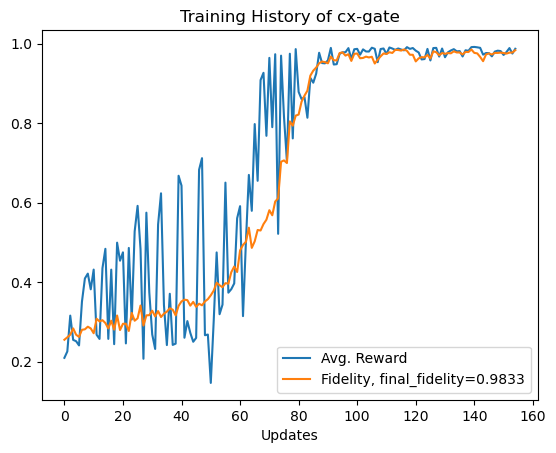

In [9]:
plt.plot(best_trial["avg_reward"], label="Avg. Reward")
plt.plot(
    best_trial["fidelity_history"],
    label=f'Fidelity, final_fidelity={round(best_trial["fidelity_history"][-1], 4)}',
)
plt.xlabel("Updates")
plt.title(f'Training History of {gate_q_env_config.target["gate"].name}-gate')
plt.legend()

In [10]:
best_trial["action_vector"]

array([-0.04611861,  1.5268072 ,  0.22374853,  1.6598921 , -1.6484693 ,
        1.5383371 , -1.6466293 ], dtype=float32)